In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv(r"C:\Users\Save_Peter\Downloads\energydata_complete.csv")

In [6]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [10]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
new_df = df.drop(['date', 'lights'], axis = 1)

In [12]:
new_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [13]:
len(new_df.columns)

27

In [95]:
df_features = new_df['T2']
df_target = new_df['T6']

In [96]:
df_features

0        19.200000
1        19.200000
2        19.200000
3        19.200000
4        19.200000
           ...    
19730    25.890000
19731    25.754000
19732    25.628571
19733    25.414000
19734    25.264286
Name: T2, Length: 19735, dtype: float64

In [97]:
df_target

0         7.026667
1         6.833333
2         6.560000
3         6.433333
4         6.366667
           ...    
19730    24.796667
19731    24.196667
19732    23.626667
19733    22.433333
19734    21.026667
Name: T6, Length: 19735, dtype: float64

In [18]:
colormap = plt.cm.viridis

<AxesSubplot:title={'center':'Pearson Correlation Of The Predictors'}>

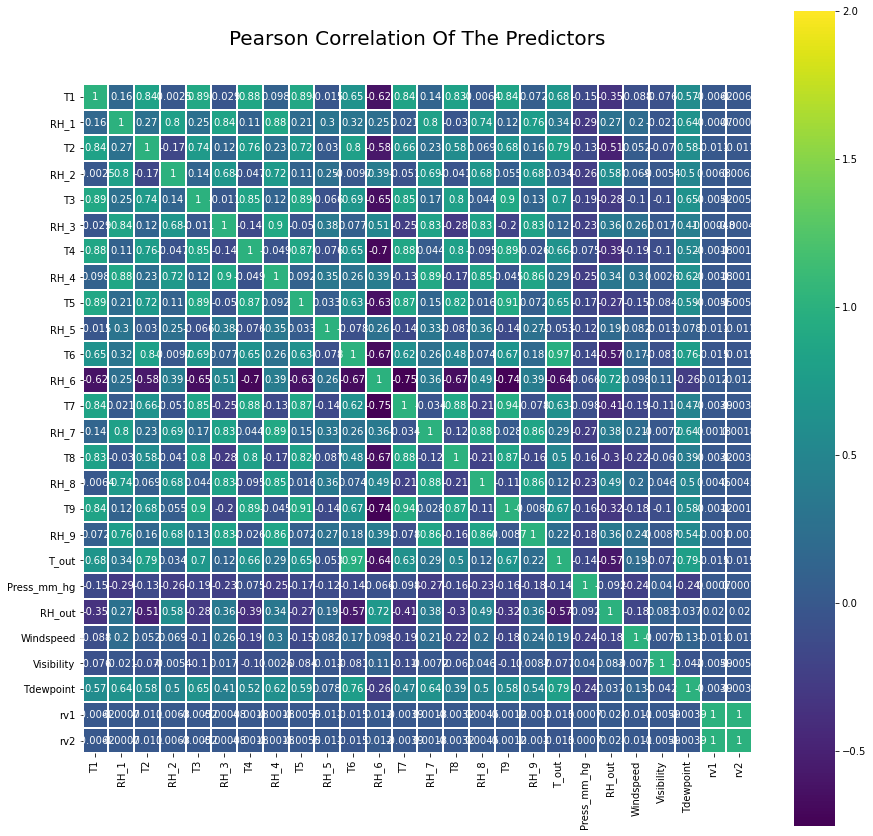

In [19]:
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation Of The Predictors', y=1.05, size = 20)
sns.heatmap(df_features.astype(float).corr(),vmax=2.0, linewidths=1.0, square=True, cmap=colormap, annot=True)

In [120]:
Scaler = MinMaxScaler()

In [121]:
Scaled_df = pd.DataFrame(Scaler.fit_transform(new_df), columns = new_df.columns)

In [122]:
Scaled_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [101]:
X = Scaled_df['T2']
Y = Scaled_df['T6']

In [151]:
X

0        0.225345
1        0.225345
2        0.225345
3        0.225345
4        0.225345
           ...   
19730    0.711655
19731    0.701769
19732    0.692651
19733    0.677054
19734    0.666171
Name: T2, Length: 19735, dtype: float64

In [152]:
Y

0        0.381070
1        0.375443
2        0.367487
3        0.363800
4        0.361859
           ...   
19730    0.898317
19731    0.880852
19732    0.864260
19733    0.829525
19734    0.788580
Name: T6, Length: 19735, dtype: float64

In [136]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [155]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1), test_size = 0.3, random_state=42)
Regressor = LinearRegression()
Regressor.fit(X_TRAIN, Y_TRAIN)
#Ridgereg = Ridge(alpha = 0.4, normalize = True)
#Ridgereg.fit(X_TRAIN, Y_TRAIN)
#lassoreg = Lasso(alpha = 0.001, normalize = True)
#lassoreg.fit(X_TRAIN, Y_TRAIN)

LinearRegression()

In [159]:
PREDICTED_Y = Regressor.predict(X_TEST)

In [160]:
score = r2_score(Y_TEST, PREDICTED_Y)

In [162]:
print(round(score, 2))

0.64


In [163]:
mean_score = mean_absolute_error(Y_TEST, PREDICTED_Y)

In [164]:
print(round(mean_score,2))

0.08


In [165]:
rss_score = np.sum(np.square(Y_TEST-PREDICTED_Y))
print(round(rss_score,2))

66.12


In [166]:
rms_score = np.sqrt(mean_squared_error(Y_TEST, PREDICTED_Y))
print(round(rms,3)) #3 d.p

0.095


In [169]:
print("coefficient of Determination is: ", score)

coefficient of Determination is:  0.6427789637197383


In [170]:
data_x = Scaled_df.drop(['Appliances', 'rv1', 'rv2'], axis =1)
data_y = Scaled_df['Appliances']

In [172]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42)
Regressor1 = LinearRegression()
Regressor1.fit(data_x_train, data_y_train)

LinearRegression()

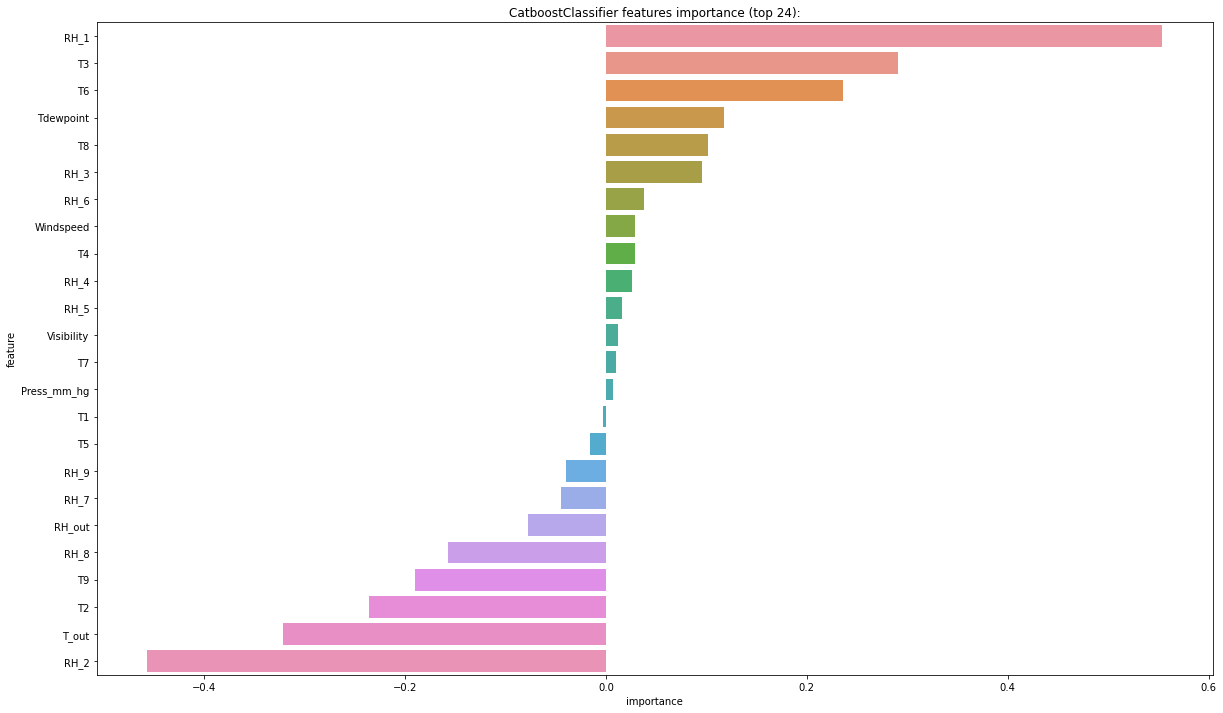

In [174]:
#LET'S PLOT FEATURE IMPORTANCE

feature_importance_df = pd.DataFrame(Regressor1.coef_, columns=['importance'])
feature_importance_df['feature'] = data_x.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(24))
plt.title('CatboostClassifier features importance (top 24):');

In [ ]:
#Thus RH_1  and RH_2 are the highest and lowest respectively

In [175]:
Ridgereg = Ridge(alpha = 0.4, normalize = True)
Ridgereg.fit(data_x_train, data_y_train)

Ridge(alpha=0.4, normalize=True)

In [176]:
pred_data_y = Ridgereg.predict(data_x_test)
data_rms_score = np.sqrt(mean_squared_error(data_y_test, pred_data_y))
print(round(rms,3)) #3 d.p

0.095


In [ ]:
#No, There is no change in the root meansquared error

In [177]:
lassoreg = Lasso(alpha = 0.001, normalize = True)
lassoreg.fit(data_x_train, data_y_train)


Lasso(alpha=0.001, normalize=True)

In [179]:
importance = lassoreg.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: -0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


In [ ]:
#Thus, 4 of the features have non zero feature weights

In [180]:
lasso_pred = lassoreg.predict(data_x_test)
lasso_rms_score = np.sqrt(mean_squared_error(data_y_test, lasso_pred))

In [182]:
print(round(lasso_rms_score,3))

0.095
